In [1]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

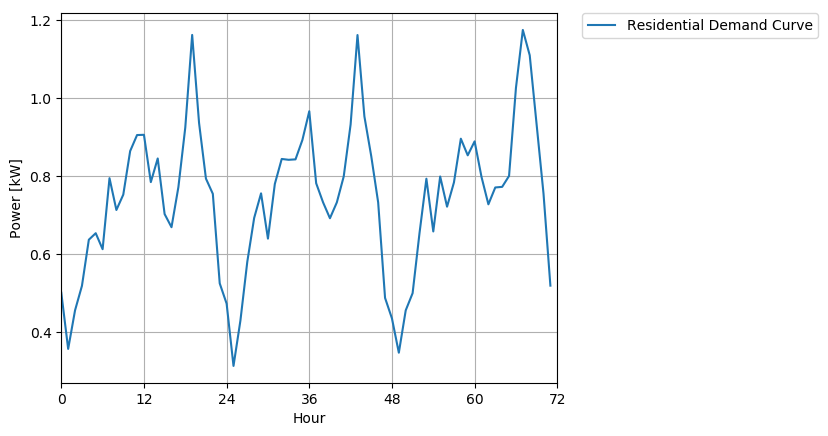

In [52]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(0:1.2)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

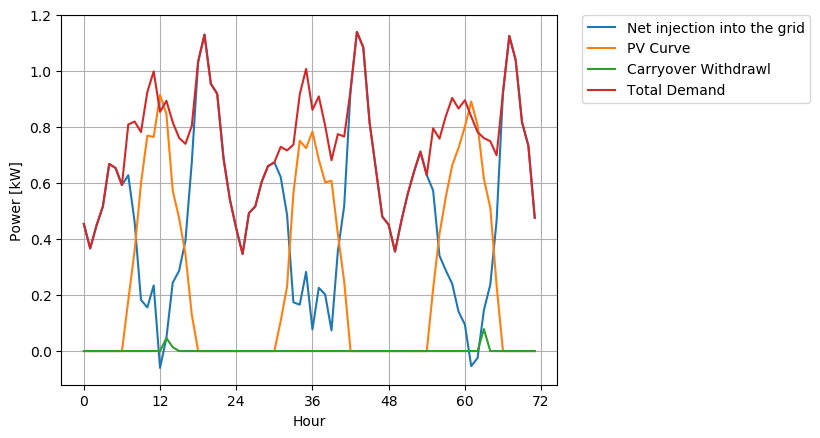

In [3]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

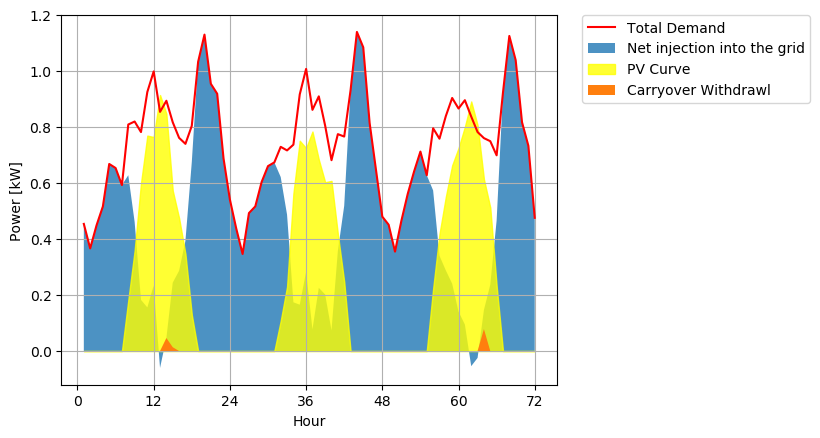

In [4]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [5]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 544.22 198.36  | 0.85 0.85 345.86 0.0  | 198.36 0.85 97.19 0.85  | 0.0 
2 546.78 131.74  | 0.0 0.0 415.05 0.0  | 330.09 0.85 160.89 0.0  | 0.0 
3 553.02 138.11  | 0.0 0.0 414.91 0.0  | 468.2 0.85 228.57 0.0  | 0.0 
4 540.11 153.76  | 0.0 0.0 386.35 0.0  | 621.96 0.85 303.91 0.0  | 0.0 
5 555.64 169.08  | 0.0 0.0 386.56 0.0  | 791.05 0.85 386.76 0.0  | 0.0 
6 557.53 162.71  | 0.07 0.07 394.81 0.0  | 953.76 0.92 466.49 0.07  | 0.0 
7 536.01 156.2  | 0.0 0.0 379.81 0.0  | 1109.96 0.92 542.96 0.0  | 0.0 
8 549.33 183.83  | 0.25 0.25 365.5 0.0  | 1293.79 1.17 633.04 0.25  | 0.0 
9 536.38 161.53  | 0.0 0.0 374.84 0.0  | 1455.32 1.17 711.94 0.0  | 0.0 
10 559.13 176.29  | 0.84 0.84 382.84 0.0  | 1631.61 2.01 798.32 0.84  | 0.0 
11 560.4 161.61  | 0.0 0.0 398.79 0.0  | 1793.21 2.01 876.66 0.0  | 0.0 
12 559.36 174.17  | 

### Billings case residential 1

In [6]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
117376.52 17.88 117394.39  | 139993.06 22598.66
125264.75 0.0 125264.75  | 140285.18 15020.43
125248.88 0.0 125248.88  | 140995.86 15746.98
121992.68 0.0 121992.68  | 139524.85 17532.17
122016.39 0.0 122016.39  | 141295.4 19279.0
122957.66 1.37 122959.03  | 141510.17 18551.14
121247.11 0.0 121247.11  | 139056.82 17809.71
119615.84 5.35 119621.2  | 140576.1 20954.91
120680.54 0.0 120680.54  | 139098.56 18418.02
121592.55 17.74 121610.29  | 141692.89 20082.6
123411.5 0.0 123411.5  | 141837.73 18426.24
121860.13 0.49 121860.61  | 141718.97 19858.36


## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [7]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

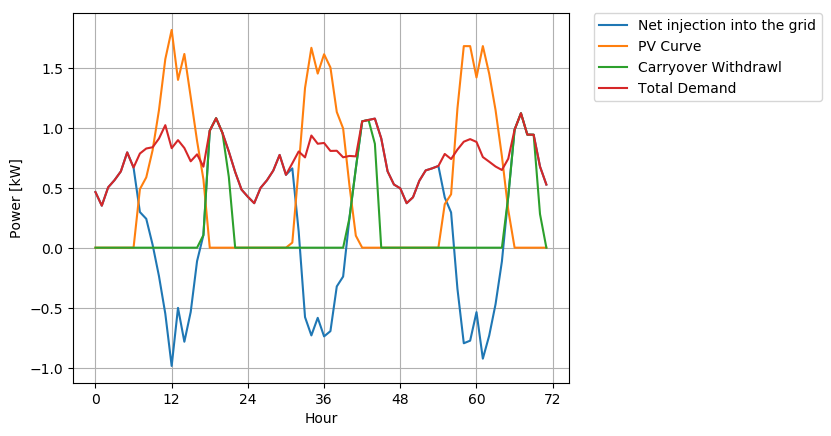

In [8]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

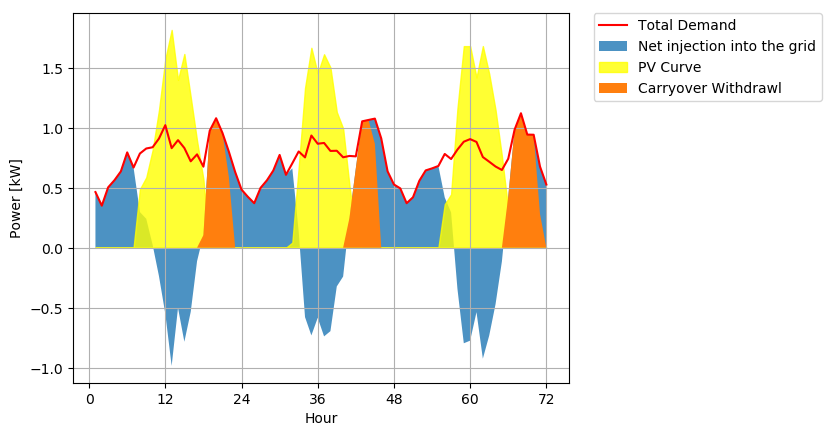

In [9]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [10]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 545.29 389.68  | 139.73 139.73 155.61 0.0  | 389.68 139.73 190.95 139.73  | 0.0 
2 543.68 272.83  | 50.8 50.8 270.84 0.0  | 662.52 190.53 184.91 50.8  | 0.0 
3 552.94 293.58  | 76.54 76.54 259.36 0.0  | 956.1 267.07 277.96 76.54  | 0.0 
4 541.41 328.6  | 97.89 97.89 212.81 0.0  | 1284.7 364.96 362.43 97.89  | 0.0 
5 555.26 333.12  | 92.29 92.29 222.14 0.0  | 1617.81 457.26 427.77 92.29  | 0.0 
6 555.79 347.42  | 103.96 103.96 208.37 0.0  | 1965.23 561.21 505.71 103.96  | 0.0 
7 539.67 360.26  | 126.86 126.86 179.4 0.0  | 2325.5 688.07 578.28 126.86  | 0.0 
8 544.38 331.4  | 93.86 93.86 212.98 0.0  | 2656.9 781.93 613.81 93.86  | 0.0 
9 537.72 361.08  | 116.33 116.33 176.64 0.0  | 3017.97 898.26 696.87 116.33  | 0.0 
10 559.79 334.86  | 87.41 87.41 224.93 0.0  | 3352.83 985.67 744.62 87.41  | 0.0 
11 559.38 342.27

### Billings case residential 2

In [11]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
73710.28 2938.5 76648.78  | 140115.0 63466.22
86871.19 1068.36 87939.56  | 139931.26 51991.71
85604.24 1609.71 87213.95  | 140986.74 53772.79
80469.59 2058.6 82528.2  | 139672.17 57143.98
81499.56 1940.93 83440.5  | 141251.99 57811.5
79980.38 2186.24 82166.62  | 141312.45 59145.83
75420.68 2667.78 78088.46  | 139473.94 61385.48
80488.33 1973.93 82462.26  | 140010.65 57548.4
75221.82 2446.44 77668.25  | 139251.31 61583.06
81807.31 1838.16 83645.47  | 141768.75 58123.28
80943.67 2270.71 83214.38  | 141721.26 58506.88
81449.19 2053.33 83502.52  | 141492.84 57990.32


## Residential Case 3: Large PV System that generates multi-day carry over

In [12]:
PVRes.capacity = 3.0
ts=simulate(residential, PVRes, 3);

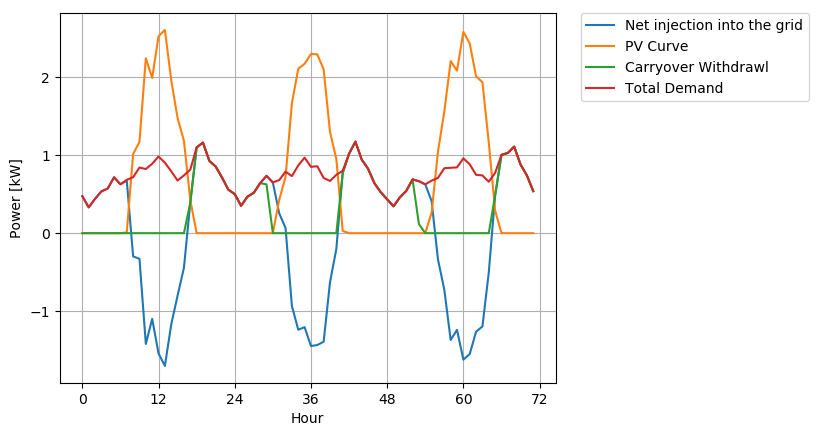

In [13]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

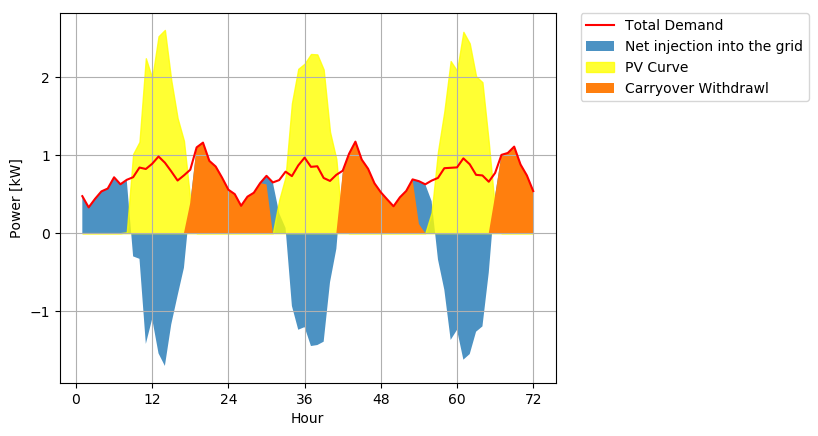

In [14]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [15]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 548.21 568.68  | 316.53 296.05 0.0 0.0  | 568.68 296.05 278.65 278.65  | 20.47 
2 547.01 391.59  | 171.49 171.49 155.42 0.0  | 960.27 467.54 174.48 171.49  | 0.0 
3 553.85 463.47  | 233.0 231.79 91.58 0.0  | 1423.74 699.33 230.09 230.09  | 1.2 
4 542.25 527.89  | 273.17 270.25 17.28 0.0  | 1951.63 969.58 256.97 256.97  | 2.92 
5 553.42 516.94  | 259.99 258.19 38.29 0.0  | 2468.57 1227.77 240.02 240.02  | 1.8 
6 558.71 512.43  | 249.29 247.44 48.13 0.0  | 2981.0 1475.21 232.92 232.92  | 1.85 
7 540.11 536.45  | 274.45 271.56 6.54 0.0  | 3517.45 1746.78 248.34 248.34  | 2.88 
8 545.04 491.3  | 245.36 243.62 55.47 0.0  | 4008.76 1990.39 217.51 217.51  | 1.74 
9 536.56 523.51  | 264.8 262.2 15.65 0.0  | 4532.27 2252.59 230.42 230.42  | 2.6 
10 559.9 485.88  | 233.11 232.0 75.13 0.0  | 5018.15 2484.59 206.3 206.3  | 1

### Billings case residential 3

In [16]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
0.0 6225.98 6225.98  | 140447.58 134221.6
73697.09 3606.37 77303.47  | 140310.91 63007.44
69108.96 4874.6 73983.56  | 141091.39 67107.83
39413.29 5683.28 45096.57  | 139768.3 94671.73
65278.48 5429.79 70708.27  | 141042.47 70334.2
65986.02 5203.72 71189.74  | 141645.24 70455.5
16252.61 5710.98 21963.59  | 139523.95 117560.36
66513.88 5123.28 71637.16  | 140086.32 68449.17
35892.95 5513.98 41406.92  | 139119.61 97712.69
67926.81 4878.9 72805.71  | 141780.81 68975.1
65940.19 5267.16 71207.35  | 141577.43 70370.08
65473.18 5252.82 70726.0  | 141613.14 70887.14


# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

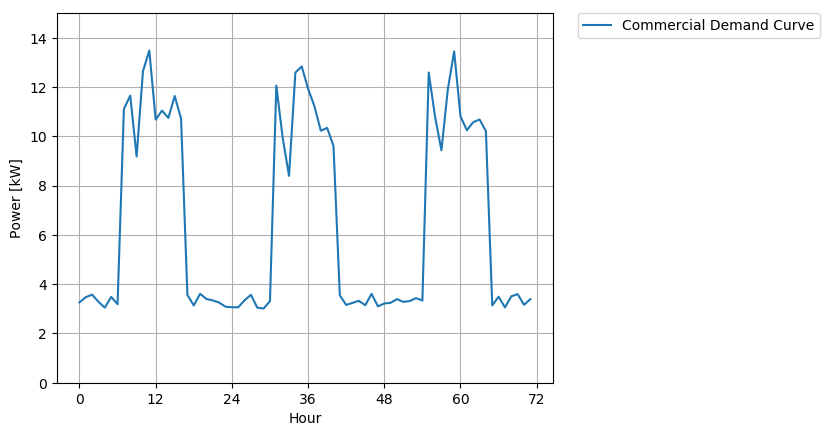

In [62]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,15)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [49]:
mean(commercial.peak_power)

13.847359136480511

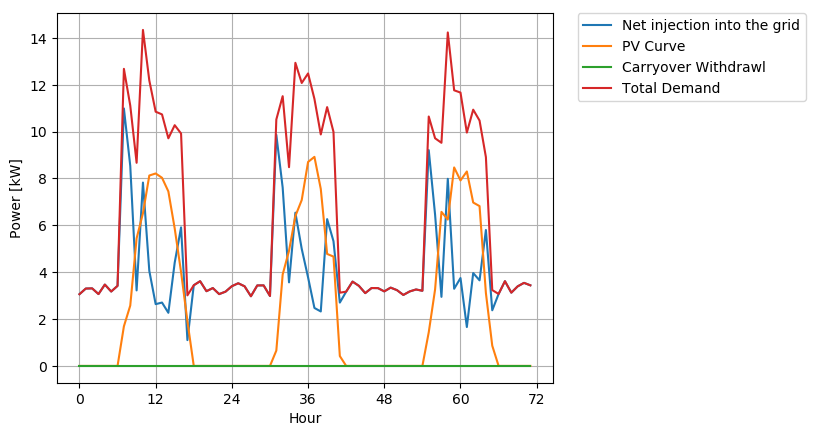

In [18]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

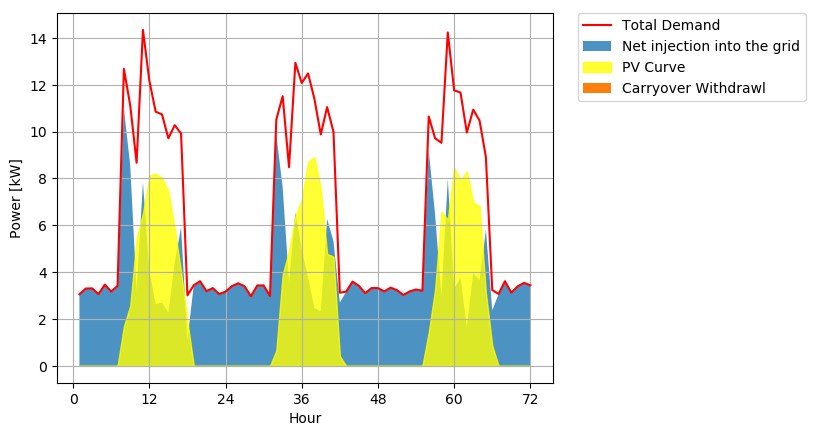

In [19]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [20]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 5014.18 1957.16  | 0.0 0.0 3057.02 0.0  | 14.83 8.96  | 1957.16 0.0 959.01 0.0  | 0.0 
2 5096.28 1308.69  | 0.0 0.0 3787.59 0.0  | 16.87 12.61  | 3265.84 0.0 1600.26 0.0  | 0.0 
3 4851.32 1520.75  | 0.0 0.0 3330.57 0.0  | 16.87 12.61  | 4786.59 0.0 2345.43 0.0  | 0.0 
4 5011.72 1493.95  | 0.0 0.0 3517.77 0.0  | 16.87 12.61  | 6280.54 0.0 3077.47 0.0  | 0.0 
5 5352.18 1795.93  | 0.0 0.0 3556.25 0.0  | 16.87 12.61  | 8076.47 0.0 3957.47 0.0  | 0.0 
6 5180.15 1769.05  | 0.0 0.0 3411.11 0.0  | 16.87 12.61  | 9845.52 0.0 4824.3 0.0  | 0.0 
7 4955.98 1671.85  | 0.0 0.0 3284.12 0.0  | 16.87 12.61  | 11517.37 0.0 5643.51 0.0  | 0.0 
8 5029.82 1658.55  | 0.0 0.0 3371.28 0.0  | 16.87 12.61  | 13175.92 0.0 6456.2 0.0  | 0.0 
9 4905.45 1859.78  | 0.0 0.0 3045.67 0.0  | 16.87 12.61  | 15035.7 0.0 736

In [21]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
223529.59 0.0 223529.59 102572.52  | 366636.91 169712.86  | 143107.32 67140.34
276948.42 0.0 276948.42 144325.57  | 372639.67 193066.74  | 95691.24 48741.16
243531.43 0.0 243531.43 144325.57  | 354728.54 193066.74  | 111197.11 48741.16
257219.55 0.0 257219.55 144325.57  | 366457.13 193066.74  | 109237.58 48741.16
260033.19 0.0 260033.19 144325.57  | 391351.3 193066.74  | 131318.11 48741.16
249420.04 0.0 249420.04 144325.57  | 378772.87 193066.74  | 129352.83 48741.16
240135.06 0.0 240135.06 144325.57  | 362381.07 193066.74  | 122246.01 48741.16
246507.83 0.0 246507.83 144325.57  | 367780.77 193066.74  | 121272.95 48741.16
222699.64 0.0 222699.64 144325.57  | 358686.68 193066.74  | 135987.04 48741.16
363381.15 0.0 363381.15 0.0  | 346198.61 193066.74  | -17182.55 193066.74
243336.52 0.0 243336.52 144325.57  | 363055.1 193066.74  | 119718

## Commercial case 2: medium PV system

In [22]:
PVComInd.capacity = 18.0
ts=simulate(commercial, PVComInd, 3);

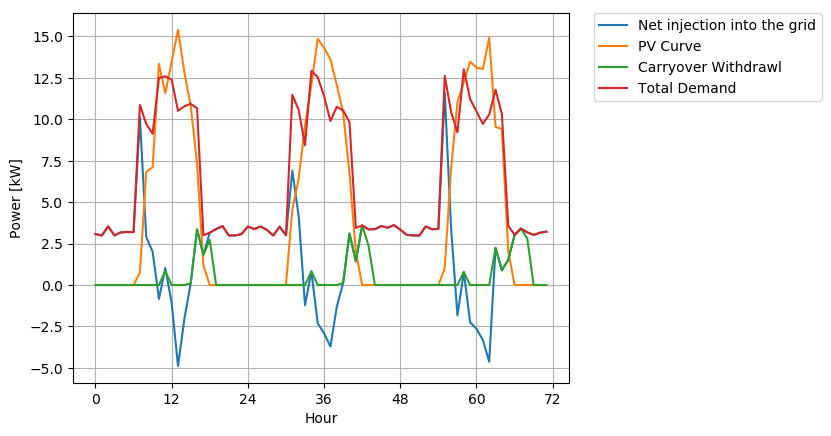

In [23]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

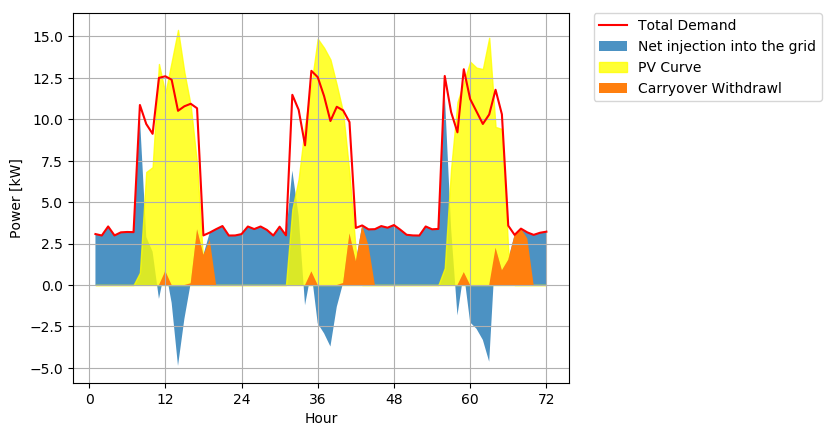

In [24]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [25]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 4984.58 3525.44  | 481.82 481.82 1459.14 0.0  | 14.88 8.95  | 3525.44 481.82 1727.47 481.82  | 0.0 
2 5108.48 2477.76  | 8.91 8.91 2630.72 0.0  | 16.76 12.52  | 6003.21 490.73 2459.75 8.91  | 0.0 
3 4843.2 2664.44  | 234.58 234.58 2178.76 0.0  | 16.76 12.52  | 8667.65 725.32 3756.41 234.58  | 0.0 
4 5028.54 3117.78  | 317.69 317.69 1910.76 0.0  | 16.76 12.52  | 11785.43 1043.01 5049.54 317.69  | 0.0 
5 5361.16 3074.12  | 56.74 56.74 2287.05 0.0  | 16.76 12.52  | 14859.54 1099.74 6238.17 56.74  | 0.0 
6 5219.3 2984.17  | 129.66 129.66 2235.13 0.0  | 16.76 12.52  | 17843.71 1229.4 7643.68 129.66  | 0.0 
7 4956.24 3123.89  | 169.44 169.44 1832.36 0.0  | 16.76 12.52  | 20967.6 1398.84 9044.72 169.44  | 0.0 
8 5019.63 3166.58  | 264.66 264.66 1853.05 0.0  | 16.76 12.52  | 24134.18 1663.5 1042

In [26]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
177227.09 10132.69 187359.78 0.0  | 364472.82 170277.1  | 177113.04 170277.1
319527.47 187.44 319714.91 0.0  | 373532.37 191863.36  | 53817.46 191863.36
264632.06 4933.26 269565.32 0.0  | 354134.77 191863.36  | 84569.45 191863.36
232081.42 6681.06 238762.48 0.0  | 367687.05 191863.36  | 128924.57 191863.36
277784.65 1193.15 278977.8 0.0  | 392008.33 191863.36  | 113030.54 191863.36
271478.76 2726.66 274205.42 0.0  | 381634.97 191863.36  | 107429.55 191863.36
222557.95 3563.31 226121.26 0.0  | 362400.49 191863.36  | 136279.23 191863.36
225071.08 5565.78 230636.86 0.0  | 367035.31 191863.36  | 136398.45 191863.36
232169.86 4839.68 237009.54 0.0  | 360353.99 191863.36  | 123344.46 191863.36
193868.07 5018.31 198886.38 0.0  | 346254.14 191863.36  | 147367.76 191863.36
220195.42 5440.96 225636.38 0.0  | 360521.88 191863.36  | 134885.5 191863

## Commercial case 3: Large PV system

In [27]:
PVComInd.capacity = 28.0
ts=simulate(commercial, PVComInd, 3);

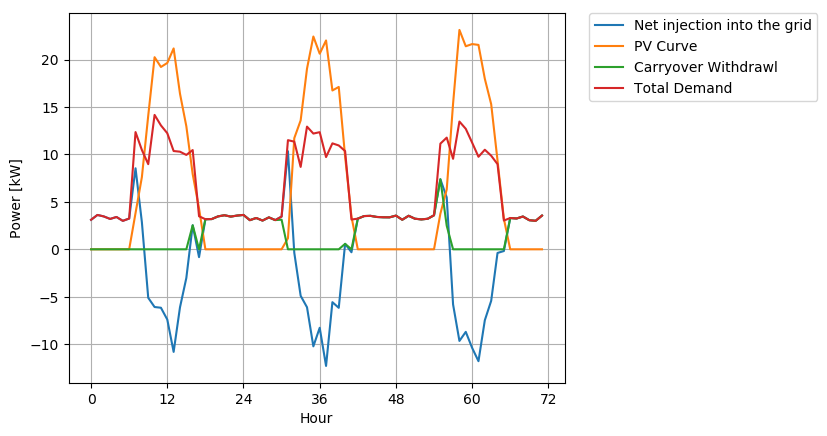

In [28]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

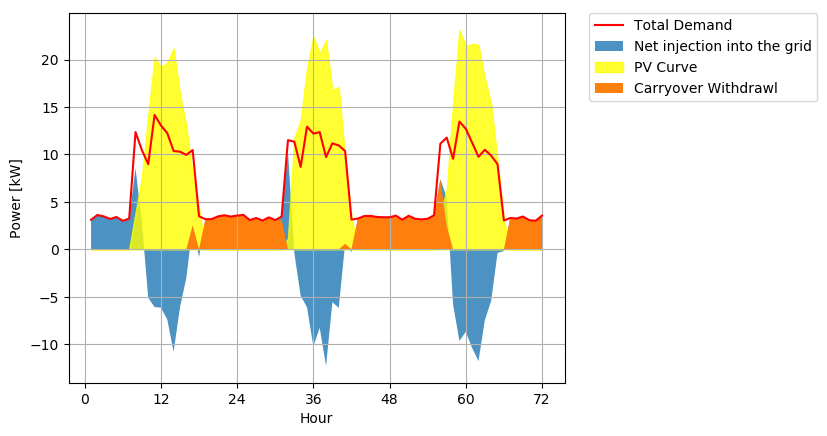

In [29]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [30]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 4985.99 5657.69  | 2322.46 1650.76 0.0 671.7  | 14.74 5.25  | 5657.69 1650.76 2772.27 2322.46  | 671.7 
2 5109.27 3531.79  | 591.83 1263.53 905.78 0.0  | 16.71 12.41  | 9189.48 2914.3 2852.08 1263.53  | 0.0 
3 4843.74 4079.82  | 1279.4 1279.4 763.91 0.0  | 16.71 12.41  | 13269.3 4193.7 3587.66 1279.4  | 0.0 
4 5028.76 4854.14  | 1363.59 1345.95 192.25 17.64  | 16.71 12.41  | 18123.44 5539.65 4686.79 1363.59  | 17.64 
5 5352.51 4932.22  | 1524.83 1532.97 412.14 9.49  | 16.71 12.41  | 23055.66 7072.62 5757.62 1542.46  | 9.49 
6 5201.32 4912.07  | 1499.64 1490.57 298.31 18.56  | 16.71 12.41  | 27967.73 8563.2 6631.57 1509.13  | 18.56 
7 4983.19 5294.77  | 2001.02 1689.44 0.0 330.14  | 16.71 12.41  | 33262.5 10252.63 7735.43 2019.58  | 330.14 
8 4993.43 4760.93  | 1384.01 1616.51 0.0 97.64  

In [31]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
0.0 34715.56 34715.56 0.0  | 364575.42 168694.47  | 329859.86 168694.47
110016.34 26572.1 136588.44 0.0  | 373589.83 191226.14  | 237001.39 191226.14
92784.78 26905.81 119690.59 0.0  | 354173.96 191226.14  | 234483.37 191226.14
23351.02 28305.39 51656.4 0.0  | 367702.58 191226.14  | 316046.18 191226.14
50058.91 32238.37 82297.28 0.0  | 391375.19 191226.14  | 309077.91 191226.14
36233.15 31346.77 67579.92 0.0  | 380320.69 191226.14  | 312740.78 191226.14
0.0 35528.89 35528.89 0.0  | 364370.96 191226.14  | 328842.07 191226.14
0.0 33995.21 33995.21 0.0  | 365119.76 191226.14  | 331124.56 191226.14
18390.16 33524.33 51914.49 0.0  | 358757.67 191226.14  | 306843.18 191226.14
0.0 34933.23 34933.23 0.0  | 346887.12 191226.14  | 311953.89 191226.14
6521.94 33077.79 39599.72 0.0  | 362968.29 191226.14  | 323368.56 191226.14
24810.18 31180.14 559

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

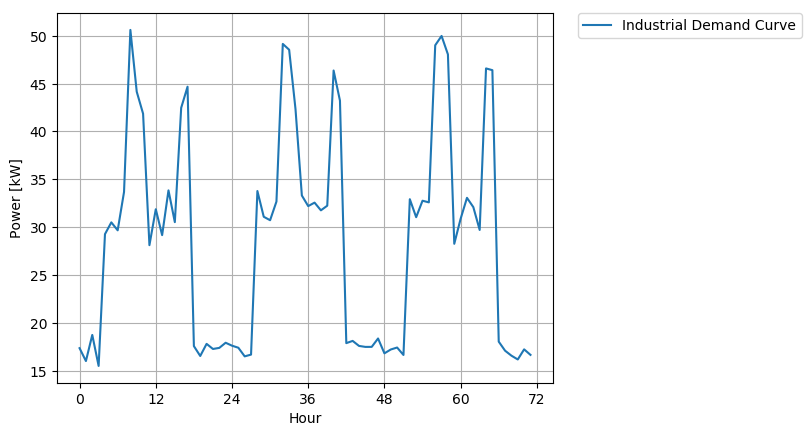

In [32]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Industrial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

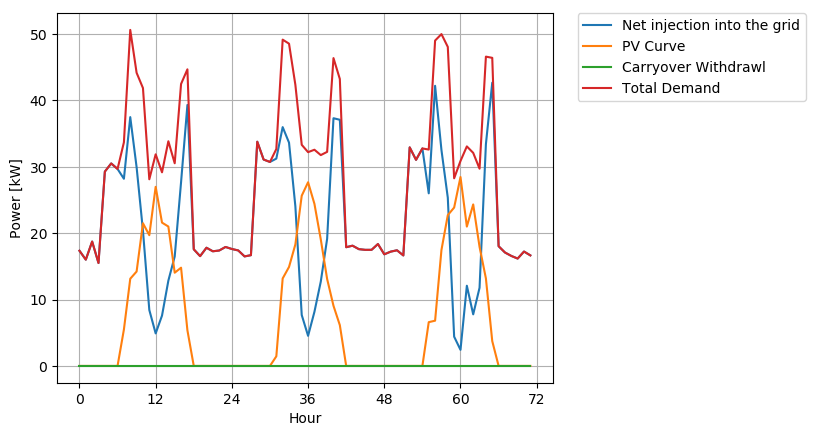

In [33]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

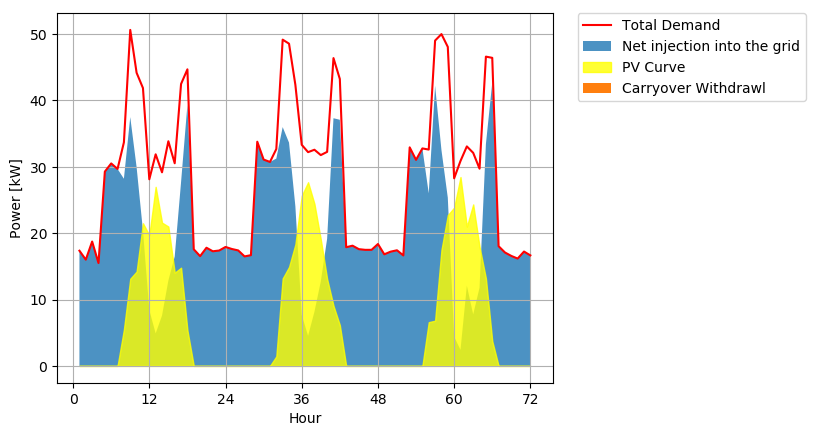

In [34]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [35]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus
1 | 7178.18 8080.5 8080.5  | 5925.68 0.0 0.0  | 4784.61 4548.39 5734.22  | 0.0  | 50.71 50.52 33.39  | 50.71 33.75 33.39  | 5925.68 0.0 2903.58 0.0  | 0.0 
2 | 6634.9 7409.25 7409.25  | 3990.0 0.0 0.0  | 4958.68 5095.48 5267.59  | 0.0  | 51.66 51.35 34.09  | 51.66 37.94 34.09  | 9915.67 0.0 4858.68 0.0  | 0.0 
3 | 7219.56 8122.3 8122.3  | 4669.46 0.0 0.0  | 5301.45 5370.95 5752.29  | 0.0  | 51.66 51.35 34.09  | 51.66 37.94 34.09  | 14585.13 0.0 7146.71 0.0  | 0.0 
4 | 7501.27 8357.83 8357.83  | 5061.16 0.0 0.0  | 5473.79 5324.15 5942.35  | 0.0  | 54.23 54.1 36.02  | 54.23 37.94 36.02  | 19646.29 0.0 9626.68 0

In [36]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
296454.58 140954.64 127930.43  | 0.0  | 296454.58 140954.64 127930.43  | 444759.94 250414.81 180276.03  | 148305.36 109460.17 52345.6  | 0.0 129610.3 0.0 
307239.67 157908.93 117519.85  | 0.0  | 307239.67 157908.93 117519.85  | 411098.35 229612.81 165300.48  | 103858.67 71703.88 47780.62  | 0.0 103711.05 0.0 
328477.94 166445.62 128333.55  | 0.0  | 328477.94 166445.62 128333.55  | 447323.82 251709.99 181208.45  | 118845.88 85264.37 52874.91  | 0.0 103711.05 0.0 
339156.13 164995.33 132573.82  | 0.0  | 339156.13 164995.33 132573.82  | 464778.7 259009.12 186463.16 

## TMT Case2: Medium PV System

In [37]:
PVTMT.capacity = 60
ts=simulate(mediumvoltage, PVTMT, 3);

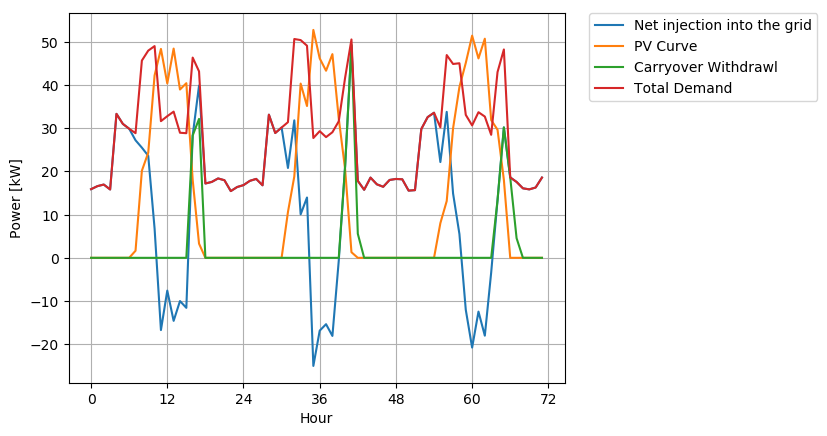

In [38]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

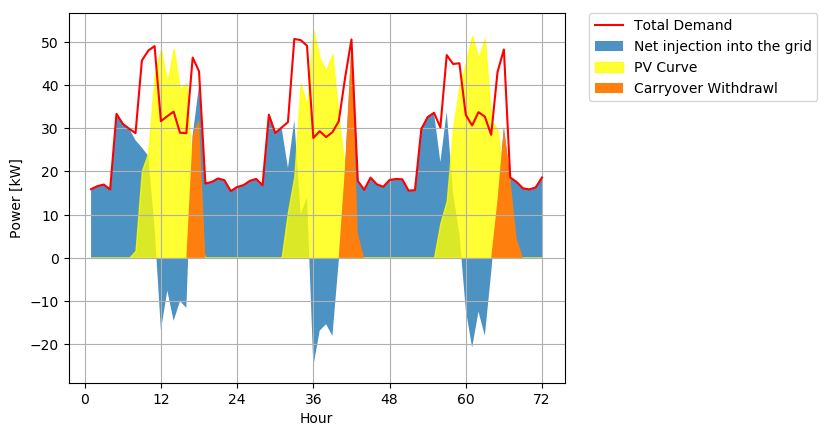

In [39]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [40]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus
1 | 7179.55 8116.57 8116.57  | 12215.93 1858.72 1858.72  | 1072.82 2007.37 5679.96  | 0.0  | 50.8 50.48 33.72  | 50.54 33.77 33.72  | 12215.93 1858.72 5985.81 1858.72  | 0.0 
2 | 6662.02 7411.98 7411.98  | 7435.63 302.59 302.59  | 3461.16 3177.21 5253.82  | 0.0  | 51.6 51.63 34.4  | 51.55 34.31 34.4  | 19651.56 2161.3 7770.55 302.59  | 0.0 
3 | 7216.43 8075.67 8075.67  | 9388.86 891.71 891.71  | 3651.23 2252.01 5755.51  | 0.0  | 51.6 51.63 34.4  | 51.55 34.31 34.4  | 29040.43 3053.02 12068.51 891.71  | 0.0 
4 | 7498.92 8413.16 8413.16  | 10752.4 1193.22 1193.22  | 2656.66 2503.01 5965.65  | 0.0  | 54.35 54.23

In [41]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
66471.99 62208.4 126719.92  | 39088.78  | 66471.99 62208.4 126719.92  | 444845.19 251532.44 181080.63  | 378373.2 189324.04 54360.72  | 2769.95 129136.23 0.0 
214453.2 98461.77 117212.61  | 6363.37  | 214453.2 98461.77 117212.61  | 412778.57 229697.34 165361.33  | 198325.38 131235.57 48148.72  | 597.21 133865.79 0.0 
226230.37 69789.64 128405.44  | 18752.77  | 226230.37 69789.64 128405.44  | 447129.91 250265.09 180168.25  | 220899.54 180475.45 51762.81  | 597.21 133865.79 0.0 
164606.9 77568.35 133093.68  | 25093.42  | 164606.9 77568.35 133093.68  | 464633.2 2607

## TMT Case 3: Large PV System

In [42]:
PVTMT.capacity = 100
ts=simulate(mediumvoltage, PVTMT, 3);

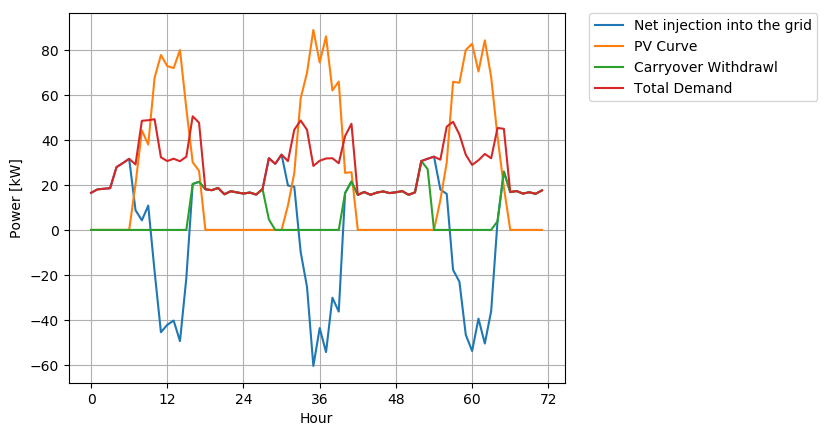

In [43]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

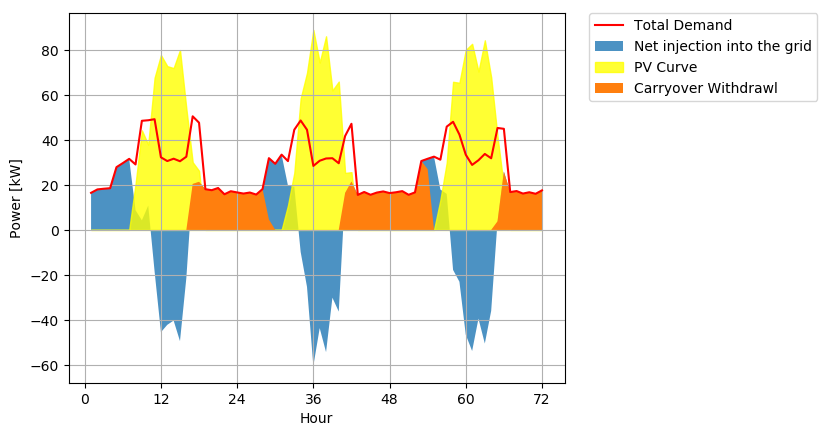

In [44]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [45]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus
1 | 7208.99 8177.22 8177.22  | 19410.5 8454.36 8454.36  | 0.0 1486.43 217.2  | 0.0  | 50.77 50.57 33.35  | 50.42 33.8 33.35  | 19410.5 8454.36 9511.14 8454.36  | 0.0 
2 | 6630.12 7454.4 7454.4  | 13659.65 4382.81 4382.81  | 0.0 1644.87 4032.49  | 0.0  | 51.51 51.14 33.71  | 50.83 34.43 33.71  | 33070.15 12837.16 7750.02 4382.81  | 0.0 
3 | 7245.07 8118.04 8118.04  | 14322.32 4361.55 4361.55  | 0.0 1523.56 5257.19  | 0.0  | 51.51 51.14 33.84  | 50.83 34.43 33.84  | 47392.47 17198.71 10385.15 4361.55  | 0.0 
4 | 7493.13 8405.15 8405.15  | 17807.07 6167.74 6167.74  | 0.0 1391.45 2633.76  | 0.0  | 54.36 53.93 36.

In [46]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
0.0 46064.56 4845.63  | 177795.11  | 0.0 46064.56 4845.63  | 446668.99 253411.93 182433.7  | 446668.99 207347.38 177588.07  | 3830.76 129634.93 0.0 
0.0 50974.59 89964.89  | 92170.44  | 0.0 50974.59 89964.89  | 410802.24 231011.74 166307.58  | 410802.24 180037.15 76342.68  | 7388.23 129158.81 0.0 
0.0 47215.0 117288.01  | 91723.37  | 0.0 47215.0 117288.01  | 448904.3 251578.14 181113.53  | 448904.3 204363.13 63825.52  | 7388.23 129158.81 0.0 
0.0 43120.96 58759.19  | 129707.53  | 0.0 43120.96 58759.19  | 464274.07 260475.46 187518.8  | 464274.07 217354.51 128759.